###Модуль Collections
1. Объект counter часто используется для для подсчёта элементов

In [ ]:
#Импортируем объект Counter из модуля collections
from collections import Counter
# Создаём пустой объект Counter
c = Counter()
c['red'] += 1
print(c)

Counter({'red': 1})


In [ ]:
cars = ['red', 'blue', 'black', 'black', 'black', 'red', 'blue', 'red', 'white']
c = Counter()
for car in cars:
    c[car] += 1

print(c)

Counter({'red': 3, 'black': 3, 'blue': 2, 'white': 1})


In [ ]:
# То же самое можно сделать и другим способом: сразу передать в круглых скобках итерируемый объект, в котором необходимо посчитать значения:
c = Counter(cars)
print(c)

Counter({'red': 3, 'black': 3, 'blue': 2, 'white': 1})


In [ ]:
# смотрим сколько раз нам попадался каждый из объектов
print(c['black'])
print(c['purple'])
print(sum(c.values()))
print(c.values())

3
0
9
dict_values([3, 2, 3, 1])


In [ ]:
cars_moscow = ['black', 'black', 'white', 'black', 'black', 'white', 'yellow', 'yellow', 'yellow']
cars_spb = ['red', 'black', 'black', 'white', 'white', 'yellow', 'yellow', 'red', 'white']
counter_moscow = Counter(cars_moscow)
counter_spb = Counter(cars_spb)
print(counter_moscow)
print(counter_spb)
print(counter_moscow + counter_spb)


Counter({'black': 4, 'yellow': 3, 'white': 2})
Counter({'white': 3, 'red': 2, 'black': 2, 'yellow': 2})
Counter({'black': 6, 'white': 5, 'yellow': 5, 'red': 2})


In [ ]:
counter_moscow.subtract(counter_spb) # вычиатем один каунтер из другого
print(counter_moscow)

Counter({'black': 2, 'yellow': 1, 'white': -1, 'red': -2})


In [ ]:
# Пересоздаём счётчики, потому что объект counter_moscow поменял свои значения
# после функции subtract.
counter_moscow = Counter(cars_moscow)
counter_spb = Counter(cars_spb)

print(counter_moscow - counter_spb)

Counter({'black': 2, 'yellow': 1})


In [ ]:
#Получаем список элементов, для этого распакуем каунтер
print(*counter_moscow.elements())

black black black black white white yellow yellow yellow


In [ ]:
#Чтобы получить список уникальных элементов, достаточно воспользоваться функцией list():
print(list(counter_moscow))
print(dict(counter_moscow))
print(counter_moscow.most_common())
print(counter_moscow.most_common(2))
counter_moscow.clear()
print(counter_moscow)

['black', 'white', 'yellow']
{'black': 4, 'white': 2, 'yellow': 3}
[('black', 4), ('yellow', 3), ('white', 2)]
[('black', 4), ('yellow', 3)]
Counter()


###Defaultdict
Например, у нас есть список кортежей ниже

In [ ]:
students = [('Ivanov',1),('Smirnov',4),('Petrov',3),('Kuznetsova',1),
            ('Nikitina',2),('Markov',3),('Pavlov',2)]
#Сохраним эти данные в словаре, в котором ключами будут номера групп,
# а элементами — списки студентов. Сделать это можно следующим образом:
groups = dict()

for student, group in students:
    # Проверяем, есть ли уже эта группа в словаре
    if group not in groups:
        # Если группы ещё нет в словаре, создаём для неё пустой список
        groups[group] = list()
    groups[group].append(student)

print(groups)

{1: ['Ivanov', 'Kuznetsova'], 4: ['Smirnov'], 3: ['Petrov', 'Markov'], 2: ['Nikitina', 'Pavlov']}


В данном коде в цикле for происходит распаковка кортежа: в переменные цикла student и group попадают первый и второй элементы кортежей из списка students. То есть на первой итерации цикла в переменной student содержится строка 'Ivanov', а в переменной group — целое число 1. На второй итерации цикла в переменной student содержится строка 'Smirnov', а в переменной group — целое число 4. И так далее.
Обратите внимание, что для решения этой задачи нам потребовался шаг с проверкой наличия номера группы в словаре. Если номера группы не было, для этой группы мы создавали новый список в словаре. Без шага проверки мы бы натолкнулись на KeyError:

groups = dict()

for student, group in students:
    groups[group].append(student)

print(groups)
# KeyError: 1

То же самое можно сделать и другим способом

In [ ]:
from collections import defaultdict
groups = defaultdict(list)
for student, group in students:
    groups[group].append(student)

print(groups)
print(groups[3])
print(groups[2021]) #Теперь в словаре groups автоматически появился элемент 2021
#с пустым списком внутри, несмотря на то что мы его не создавали:
print(groups)

defaultdict(<class 'list'>, {1: ['Ivanov', 'Kuznetsova'], 4: ['Smirnov'], 3: ['Petrov', 'Markov'], 2: ['Nikitina', 'Pavlov']})
['Petrov', 'Markov']
[]
defaultdict(<class 'list'>, {1: ['Ivanov', 'Kuznetsova'], 4: ['Smirnov'], 3: ['Petrov', 'Markov'], 2: ['Nikitina', 'Pavlov'], 2021: []})


In [ ]:
# Разбираемся с чем конркетно мы имеем дело в коде
dict_object = dict()
defaultdict_object = defaultdict()

print(type(dict_object))
print(type(defaultdict_object))

<class 'dict'>
<class 'collections.defaultdict'>


In [ ]:
print(dict_object)
print(defaultdict_object)

{}
defaultdict(None, {})


###Модуль Collections. Deque и OrderedDict

OrderedDict гарантирует сохранение ключей в порядке их добавления. В обычном случае (если версия Python младше 3.7) этот порядок не гарантирутеся и каждый раз при создании словаря может быть разный

In [ ]:
from collections import OrderedDict
data = [('Ivan', 19),('Mark', 25),('Andrey', 23),('Maria', 20)]
ordered_client_ages = OrderedDict(data)
print(ordered_client_ages)

OrderedDict([('Ivan', 19), ('Mark', 25), ('Andrey', 23), ('Maria', 20)])


In [ ]:
data = [('Ivan', 19),('Mark', 25),('Andrey', 23),('Maria', 20)]
# Сортируем по второму значению из кортежа, то есть по возрасту
ordered_client_ages = OrderedDict(sorted(data, key=lambda x: x[1]))
print(ordered_client_ages)

OrderedDict([('Ivan', 19), ('Maria', 20), ('Andrey', 23), ('Mark', 25)])


Если теперь добавить нового человека в словарь, новая запись окажется в конце:

In [ ]:
ordered_client_ages['Nikita'] = 18
print(ordered_client_ages)

OrderedDict([('Ivan', 19), ('Maria', 20), ('Andrey', 23), ('Mark', 25), ('Nikita', 18)])


Если удалить элемент, а затем добавить его снова, он также окажется в конце:

###Deque

Очередь — это упорядоченный тип данных, который обладает двумя ключевыми функциями: добавление элемента в конец очереди и извлечение самого первого элемента из очереди. То есть очередь подразумевает, что тот элемент, который первым добавлен в очередь, будет первым потом и обработан. Всё как в обычной очереди! Этот принцип сокращённо также называется FIFO (от англ. First In — First Out, «первым пришёл — первым ушёл»).

Стек (от англ. stack — стопка) — это упорядоченный тип данных, который обладает двумя основными функциями: добавление элемента в конец стека и извлечение элемента из конца стека. Эта структура данных также называется рюкзаком. Действительно, представьте себе, что вы набили вещами рюкзак. Теперь, когда вы решите достать из него самую верхнюю вещь, что это будет за вещь? Верно — та самая, которую вы убрали в рюкзак последней. Поэтому принцип стека (рюкзака) также сокращённо называется LIFO (Last In — First Out, «последним пришёл — первым ушёл»).

Наконец, существует структура данных deque (читается как «дек», англ. double-ended queue — двухконцевая очередь). Она объединяет в себе возможности и стека, и очереди: содержит функции, которые позволяют добавлять элементы в начало или в конец очереди, а также извлекать первый или последний элемент из неё.

In [ ]:
from collections import deque
dq = deque()
print(dq)

deque([])


У deque есть четыре ключевые функции:

1) append (добавить элемент в конец дека);
2) appendleft (добавить элемент в начало дека);
3) pop (удалить и вернуть элемент из конца дека);
4) popleft (удалить и вернуть элемент из начала дека).

In [ ]:
clients = deque()
clients.append('Ivanov')
clients.append('Petrov')
clients.append('Smirnov')
clients.append('Tikhonova')
print(clients)
print(clients[2])

deque(['Ivanov', 'Petrov', 'Smirnov', 'Tikhonova'])
Smirnov


In [ ]:
first_client = clients.popleft()
second_client = clients.popleft()

print("First client:", first_client)
print("Second client:", second_client)
print(clients)

First client: Ivanov
Second client: Petrov
deque(['Smirnov', 'Tikhonova'])


In [ ]:
clients.appendleft('Vip-client')
print(clients)

deque(['Vip-client', 'Smirnov', 'Tikhonova'])


In [ ]:
tired_client = clients.pop()
print(tired_client, "left the queue")
print(clients)

Tikhonova left the queue
deque(['Vip-client', 'Smirnov'])


С помощью pop всегда удаляется последний элемент из дэка. Чтобы удалить конкретный элемент по индексу, необходимо воспользоваться встроенной конструкцией del:

In [ ]:
clients = deque(['Ivanov', 'Petrov', 'Smirnov', 'Tikhonova'])
print(clients)
del clients[2]
print(clients)

deque(['Ivanov', 'Petrov', 'Smirnov', 'Tikhonova'])
deque(['Ivanov', 'Petrov', 'Tikhonova'])


In [ ]:
shop = deque([1, 2, 3, 4, 5])
print(shop)
shop.extend([11, 12, 13, 14, 15, 16, 17])
print(shop)

deque([1, 2, 3, 4, 5])
deque([1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17])


In [ ]:
shop = deque([1, 2, 3, 4, 5])
print(shop)
shop.extendleft([11, 12, 13, 14, 15, 16, 17])
print(shop)

deque([1, 2, 3, 4, 5])
deque([17, 16, 15, 14, 13, 12, 11, 1, 2, 3, 4, 5])


Обратите внимание, что «клиенты из автобуса» оказались в очереди не в том порядке, в каком они «выходили из автобуса». То есть добавленные номера не только приписаны перед записанными в очереди номерами, но также порядок добавленных элементов поменялся на обратный. Это связано с тем, что действие функции extendleft аналогично многократному применению функции appendleft, поэтому самый последний клиент из автобуса оказался в итоге первым в очереди.

In [ ]:
limited = deque(maxlen=3)
print(limited)
limited_from_list = deque([1,3,4,5,6,7], maxlen=3)
print(limited_from_list)

deque([], maxlen=3)
deque([5, 6, 7], maxlen=3)


In [ ]:
limited.extend([1,2,3])
print(limited)
print(limited.append(8))
print(limited)

deque([1, 2, 3], maxlen=3)
None
deque([2, 3, 8], maxlen=3)


In [ ]:
temps = [20.6, 19.4, 19.0, 19.0, 22.1,
        22.5, 22.8, 24.1, 25.6, 27.0,
        27.0, 25.6, 26.8, 27.3, 22.5,
        25.4, 24.4, 23.7, 23.6, 22.6,
        20.4, 17.9, 17.3, 17.3, 18.1,
        20.1, 22.2, 19.8, 21.3, 21.3,
        21.9]
days = deque(maxlen=7)
for temp in temps:
    # Добавляем температуру в очередь
    days.append(temp)
    # Если длина очереди оказалась равной максимальной длине очереди (7),
    # печатаем среднюю температуру за последние 7 дней
    if len(days) == days.maxlen:
        print(round(sum(days) / len(days), 2), end='; ')
# Напечатаем пустую строку, чтобы завершить действие параметра
# end. Иначе следующая строка окажется напечатанной на предыдущей
print("")

20.77; 21.27; 22.16; 23.3; 24.44; 24.94; 25.56; 26.2; 25.97; 25.94; 25.57; 25.1; 24.81; 24.21; 23.23; 22.57; 21.41; 20.4; 19.6; 19.1; 19.04; 18.96; 19.44; 20.01; 20.67; 


In [ ]:
dq = deque([1,2,3,4,5])
print(dq)
dq.reverse()
print(dq)

deque([1, 2, 3, 4, 5])
deque([5, 4, 3, 2, 1])


In [ ]:
dq = deque([1,2,3,4,5])
print(dq)
dq.rotate(2)
print(dq)
#rotate переносит N заданных элементов из конца очереди в начало:
dq = deque([1,2,3,4,5])
dq.rotate(-2)
print(dq)

deque([1, 2, 3, 4, 5])
deque([4, 5, 1, 2, 3])
deque([3, 4, 5, 1, 2])


In [ ]:
dq = [1,2,4,2,3,1,5,4,4,4,4,4,3]
print(dq.index(4))
print(dq.count(4))

2
6


In [ ]:
dq = deque([1,2,4,2,3,1,5,4,4,4,4,4,3])
print(dq.index(25))

ValueError: 25 is not in deque

In [ ]:
dq = deque([1,2,4,2,3,1,5,4,4,4,4,4,3])
print(dq.count(25))

0


In [ ]:
dq = deque([1,2,4,2,3,1,5,4,4,4,4,4,3])
print(dq)
dq.clear()
print(dq)

deque([1, 2, 4, 2, 3, 1, 5, 4, 4, 4, 4, 4, 3])
deque([])


Дан список из кортежей temps. На первом месте в кортеже указан год в виде строки, а на втором — средняя температура января в Петербурге в указанном году.

Напишите функцию check(temps), которая будет выводить словарь, в котором ключи — годы, а значения — показатели температуры. Ключи необходимо отсортировать в порядке убывания соответствующих им температур.

In [ ]:
temps = [('2000', -4.4), ('2001', -2.5), ('2002', -4.4), ('2003', -9.5)]
def check(temps):
    sorted_temps = OrderedDict(sorted(temps, key = lambda x: x[1], reverse= True))
    print(sorted_temps)
check(temps)

OrderedDict([('2001', -2.5), ('2000', -4.4), ('2002', -4.4), ('2003', -9.5)])

In [ ]:
ordered_client_ages = OrderedDict(sorted(data, key=lambda x: x[1]))

Упаражнения

In [ ]:
users = [6, 18, 4, 7, 8, 8, 5, 18, 12, 17, 13, 15, 6, 7, 9, 17, 18, 8, 4, 11, 10, 8, 2, 10, 6, 10, 10, 9]
users_dq = deque()
users_dq.extend(users)
print(users_dq)
print(users_dq[0])
users_dq.rotate(-5)
print(users_dq[-1])


deque([6, 18, 4, 7, 8, 8, 5, 18, 12, 17, 13, 15, 6, 7, 9, 17, 18, 8, 4, 11, 10, 8, 2, 10, 6, 10, 10, 9])
6
8


Напишите функцию brackets(line), которая определяет, является ли последовательность из круглых скобок line правильной.

Примечание 1. Какая последовательность скобок правильная?

Правильной скобочной последовательностью назовём такую последовательность скобок, в которой для каждой открывающей скобки есть последующая соответствующая ей закрывающая скобка. Соответственно, остальные скобочные последовательности назовём неправильными. Пустую строку будем считать правильной последовательностью.

Примечание 2.Для решения этой задачи потребуется использовать стек.

Посимвольно переберите строку. Если встретилась открывающаяся скобка, положите её в стек. Если встретилась закрывающаяся скобка, извлеките скобку из стека.

Если стек пустой, то есть извлечь скобку нельзя, последовательность неправильная.
Если строка закончилась и стек стал пустым, последовательность правильная.
Если в стеке остались скобки, последовательность неправильная.


print(brackets("(()())"))
# True
print(brackets(""))
# True
print(brackets("(()()))"))
# False


In [ ]:
def brackets(line):
    opening_counter = 0
    closing_counter = 0
    cond1 = closing_counter == opening_counter
    cond2 = line[0] == '('
    print(line[0])
    for symbol in line:
        if symbol == '(': opening_counter += 1
        elif symbol == ')': closing_counter += 1
        else: pass
    if cond1 and cond2: return True
    else: return False
print(brackets("(()())"))
print(brackets(""))
print(brackets("(()()))"))

(
True


IndexError: string index out of range

In [ ]:
from collections import deque

def brackets(line):
    # Напишите тело функции
    stack = deque()
    for i in line:
        if i == '(':
            stack.append(i)
        elif i == ')':
            if len(stack) == 0:
                return False
            stack.pop()
    if len(stack) == 0:
        return True
    return False


In [ ]:

from itertools import chain
north = [['Milk', 'Milk', 'Beer'], ['Chocolate', 'Bread', 'Chips'], ['Cola', 'Cola', 'Yoghurt', 'Soap', 'Beer', 'Chips', 'Milk'], ['Soap', 'Soap', 'Cola', 'Cola', 'Chips'], ['Milk', 'Beer', 'Meat', 'Ketchup', 'Cola', 'Cola', 'Chips', 'Chips', 'Cola', 'Cola'], ['Beer', 'Bread', 'Bread', 'Beer', 'Beer', 'Beer', 'Bread', 'Cheese'], ['Yoghurt', 'Beer', 'Chips', 'Milk', 'Soap', 'Cola', 'Cola', 'Cola', 'Beer', 'Cola', 'Cola', 'Cola', 'Beer', 'Ketchup', 'Beer', 'Beer', 'Beer', 'Soap'], ['Milk', 'Cola', 'Cola', 'Beer', 'Beer', 'Bread', 'Bread', 'Soap', 'Cola', 'Cola', 'Beer', 'Meat', 'Bread', 'Chips'], ['Beer', 'Beer', 'Beer', 'Chips', 'Milk', 'Cola', 'Chocolate', 'Beer', 'Chocolate', 'Beer', 'Beer', 'Cola', 'Meat', 'Yoghurt', 'Beer'], ['Bread'], ['Chocolate', 'Beer', 'Meat', 'Yoghurt'], ['Cola', 'Beer', 'Beer', 'Beer', 'Chocolate', 'Beer', 'Soap', 'Beer', 'Chips', 'Soap', 'Chocolate', 'Bread', 'Chips', 'Cola', 'Bread', 'Beer', 'Cola', 'Bread'], ['Chips', 'Cola', 'Beer', 'Chips', 'Cola', 'Cola', 'Beer', 'Soap', 'Yoghurt', 'Yoghurt', 'Cola', 'Bread', 'Beer', 'Chocolate', 'Chips', 'Bread', 'Beer', 'Bread'], ['Cola', 'Chocolate'], ['Chocolate', 'Cola', 'Meat', 'Cola', 'Ketchup', 'Cola', 'Chocolate', 'Bread', 'Chocolate', 'Chocolate', 'Meat'], ['Bread', 'Milk', 'Chips', 'Ketchup', 'Cola', 'Cola', 'Cola', 'Beer', 'Beer', 'Soap', 'Beer', 'Cola'], ['Yoghurt', 'Milk', 'Soap', 'Bread', 'Cola', 'Cola', 'Milk', 'Bread', 'Chips', 'Cheese', 'Milk', 'Yoghurt', 'Bread', 'Yoghurt'], ['Cola', 'Ketchup'], ['Cola', 'Yoghurt', 'Bread', 'Cola', 'Cola', 'Chips', 'Yoghurt', 'Milk', 'Beer', 'Chips', 'Bread', 'Beer', 'Beer', 'Cola', 'Bread', 'Beer', 'Beer', 'Cheese'], ['Beer', 'Cheese', 'Ketchup', 'Beer'], ['Beer', 'Beer', 'Beer'], ['Soap', 'Beer', 'Beer', 'Chocolate', 'Cola', 'Chocolate', 'Bread', 'Beer', 'Milk', 'Bread', 'Beer', 'Chocolate', 'Bread', 'Cola', 'Cola', 'Cheese', 'Beer', 'Cola', 'Soap', 'Yoghurt'], ['Beer', 'Chocolate'], ['Cola', 'Beer'], ['Yoghurt', 'Beer', 'Yoghurt', 'Yoghurt', 'Chips', 'Meat', 'Beer', 'Chocolate', 'Cola', 'Cola', 'Chips', 'Bread'], ['Cola', 'Cola', 'Cola', 'Cola', 'Cola', 'Bread', 'Chips', 'Soap', 'Cola', 'Chocolate', 'Beer', 'Beer'], ['Beer', 'Cola', 'Cola', 'Bread', 'Soap', 'Beer', 'Meat', 'Beer', 'Beer', 'Beer', 'Cola', 'Chips', 'Beer', 'Cola', 'Cola', 'Bread', 'Cheese', 'Beer'], ['Cola', 'Cola', 'Ketchup', 'Beer', 'Yoghurt', 'Bread'], ['Chips', 'Yoghurt', 'Cola', 'Cola', 'Cola', 'Chocolate', 'Chips', 'Bread', 'Chocolate', 'Yoghurt', 'Chocolate', 'Milk', 'Bread', 'Bread', 'Soap', 'Milk', 'Soap', 'Cola', 'Bread', 'Beer'], ['Beer', 'Beer', 'Ketchup', 'Cola', 'Beer', 'Bread', 'Beer', 'Cola', 'Beer', 'Chocolate'], ['Beer', 'Chocolate', 'Cola', 'Beer', 'Yoghurt', 'Milk', 'Bread', 'Cheese', 'Yoghurt', 'Beer', 'Cola', 'Yoghurt', 'Cola', 'Soap', 'Beer', 'Bread', 'Meat', 'Bread', 'Cola'], ['Beer', 'Cola', 'Chips', 'Cola'], ['Cola', 'Cola', 'Beer', 'Cheese'], ['Bread', 'Soap', 'Ketchup', 'Chocolate', 'Beer', 'Cola', 'Chocolate', 'Cola', 'Cola', 'Yoghurt', 'Beer', 'Bread', 'Cola', 'Ketchup', 'Beer'], ['Bread'], ['Bread', 'Beer', 'Yoghurt', 'Yoghurt', 'Bread', 'Milk', 'Soap', 'Meat', 'Bread', 'Beer', 'Cola', 'Milk', 'Milk', 'Bread', 'Beer', 'Cola', 'Ketchup', 'Cola'], ['Bread', 'Beer', 'Bread', 'Yoghurt', 'Beer', 'Bread', 'Cola', 'Cola', 'Cola', 'Beer', 'Bread', 'Milk', 'Chips', 'Cola', 'Beer', 'Bread', 'Soap', 'Bread', 'Yoghurt', 'Bread'], ['Yoghurt', 'Beer', 'Cola', 'Beer', 'Beer', 'Beer'], ['Chips', 'Chocolate', 'Soap', 'Chocolate', 'Cola', 'Bread', 'Beer', 'Cola', 'Beer', 'Ketchup', 'Chocolate', 'Ketchup', 'Ketchup', 'Cheese', 'Chips', 'Beer', 'Chips', 'Chocolate'], ['Bread', 'Cola', 'Cola', 'Beer', 'Bread', 'Bread', 'Beer', 'Chocolate', 'Bread', 'Cola', 'Milk', 'Chips', 'Meat', 'Beer', 'Beer', 'Soap', 'Bread'], ['Beer', 'Beer', 'Bread', 'Chips', 'Beer', 'Bread', 'Bread', 'Chips', 'Beer'], ['Yoghurt', 'Bread', 'Cola', 'Bread', 'Cola', 'Bread', 'Meat', 'Cola', 'Bread', 'Beer', 'Soap', 'Chips'], ['Bread', 'Beer'], ['Milk', 'Beer', 'Meat', 'Cola', 'Beer', 'Cola', 'Cola'], ['Beer', 'Chips', 'Yoghurt', 'Beer', 'Cola', 'Beer', 'Cola', 'Cola', 'Soap', 'Cola'], ['Bread', 'Cola', 'Cola', 'Meat'], ['Cola', 'Chocolate', 'Meat', 'Beer', 'Cola', 'Bread', 'Chips', 'Beer', 'Chips', 'Chips', 'Cola'], ['Bread', 'Cola', 'Cola', 'Cola', 'Beer', 'Cola', 'Yoghurt', 'Beer', 'Chips', 'Cola', 'Chocolate', 'Chips', 'Cola', 'Cola', 'Cola', 'Cola', 'Bread', 'Cola'], ['Cola', 'Soap', 'Cola'], ['Soap', 'Chips', 'Cola', 'Beer', 'Bread', 'Soap', 'Cheese', 'Bread', 'Beer', 'Chocolate']]
south = [['Cola', 'Meat', 'Cheese', 'Yoghurt', 'Beer', 'Milk', 'Milk', 'Meat', 'Cola', 'Cola', 'Cheese', 'Beer', 'Yoghurt', 'Beer', 'Bread', 'Bread', 'Milk', 'Cheese', 'Chocolate'], ['Soap', 'Milk', 'Cola'], ['Milk', 'Bread', 'Yoghurt', 'Meat', 'Meat'], ['Bread', 'Milk', 'Beer'], ['Beer'], ['Chocolate', 'Meat', 'Chocolate', 'Cola', 'Cola', 'Cola', 'Cola', 'Yoghurt', 'Bread', 'Meat', 'Soap', 'Soap', 'Milk', 'Milk', 'Cola'], ['Beer', 'Beer', 'Meat', 'Chips', 'Bread', 'Bread', 'Bread', 'Bread', 'Milk', 'Cola', 'Chocolate', 'Bread', 'Beer', 'Chips', 'Bread', 'Bread', 'Yoghurt'], ['Chips', 'Milk', 'Soap'], ['Meat', 'Beer', 'Milk', 'Chocolate', 'Bread', 'Yoghurt'], ['Chips', 'Meat', 'Chocolate', 'Bread', 'Cola', 'Cola', 'Chocolate', 'Meat', 'Yoghurt', 'Milk'], ['Bread', 'Soap', 'Bread', 'Meat', 'Beer', 'Yoghurt', 'Milk', 'Cola', 'Bread', 'Ketchup'], ['Meat', 'Milk'], ['Meat', 'Beer', 'Yoghurt'], ['Cola', 'Bread', 'Cola', 'Chocolate', 'Chips', 'Meat', 'Cheese'], ['Milk', 'Milk', 'Cheese', 'Meat'], ['Chips', 'Yoghurt', 'Cheese', 'Soap', 'Ketchup', 'Cheese', 'Soap', 'Beer', 'Ketchup', 'Ketchup', 'Milk', 'Bread', 'Bread', 'Beer'], ['Meat'], ['Ketchup', 'Bread', 'Beer', 'Milk', 'Bread', 'Meat', 'Ketchup', 'Cheese'], ['Meat', 'Chips', 'Bread', 'Meat', 'Milk', 'Soap', 'Chocolate', 'Meat', 'Chocolate', 'Chocolate', 'Bread', 'Cheese', 'Soap', 'Cola', 'Yoghurt'], ['Cheese', 'Milk', 'Bread', 'Milk', 'Chips', 'Chips', 'Meat', 'Beer', 'Chocolate', 'Chocolate'], ['Ketchup', 'Beer', 'Cheese', 'Cola'], ['Chocolate', 'Cheese', 'Bread'], ['Milk', 'Yoghurt', 'Ketchup', 'Beer', 'Meat', 'Chips', 'Yoghurt', 'Meat', 'Bread', 'Chips'], ['Yoghurt', 'Milk', 'Ketchup', 'Yoghurt', 'Beer', 'Cheese', 'Bread', 'Bread', 'Ketchup', 'Bread', 'Bread', 'Yoghurt', 'Meat'], ['Soap', 'Meat', 'Bread', 'Beer', 'Milk'], ['Beer', 'Cola', 'Beer', 'Meat', 'Meat', 'Cheese', 'Meat', 'Chocolate', 'Bread', 'Ketchup', 'Milk', 'Soap'], ['Cheese', 'Chocolate', 'Milk', 'Chocolate', 'Cola', 'Bread', 'Chips', 'Cheese', 'Soap', 'Ketchup', 'Cheese', 'Chips', 'Cheese', 'Cola', 'Chocolate', 'Beer'], ['Bread', 'Bread', 'Cola', 'Ketchup', 'Cola', 'Bread', 'Meat', 'Yoghurt', 'Milk', 'Beer', 'Beer', 'Cheese', 'Meat', 'Bread', 'Cheese', 'Meat', 'Chocolate'], ['Chocolate', 'Soap', 'Chips', 'Beer', 'Bread', 'Yoghurt', 'Chips', 'Chocolate', 'Beer', 'Cheese', 'Cola', 'Milk', 'Chips', 'Milk', 'Ketchup', 'Cola', 'Meat', 'Beer', 'Cheese', 'Yoghurt'], ['Soap'], ['Meat', 'Beer', 'Milk', 'Bread', 'Beer', 'Cheese', 'Chocolate', 'Beer', 'Beer', 'Milk', 'Beer', 'Bread', 'Meat', 'Beer', 'Chocolate', 'Beer', 'Soap', 'Chips', 'Cola'], ['Cola', 'Beer', 'Meat', 'Chips', 'Soap', 'Cola', 'Bread', 'Cola', 'Bread', 'Chips', 'Ketchup', 'Ketchup', 'Beer', 'Ketchup', 'Cola', 'Milk', 'Cheese'], ['Cheese', 'Milk', 'Chips', 'Bread', 'Yoghurt', 'Soap', 'Beer', 'Chips', 'Ketchup', 'Chips', 'Beer', 'Yoghurt', 'Cola', 'Cheese', 'Chocolate', 'Beer'], ['Meat', 'Bread', 'Meat', 'Bread'], ['Cola', 'Beer', 'Yoghurt'], ['Beer', 'Bread', 'Beer', 'Meat', 'Bread', 'Milk', 'Soap', 'Milk', 'Chocolate', 'Meat', 'Meat', 'Meat', 'Chips', 'Chocolate', 'Meat'], ['Beer', 'Cola', 'Chocolate', 'Bread', 'Cheese', 'Cheese'], ['Milk', 'Chips', 'Cola', 'Milk', 'Bread', 'Bread', 'Beer', 'Milk', 'Cola', 'Chocolate', 'Chocolate', 'Meat', 'Cola', 'Cola', 'Beer', 'Cola', 'Chocolate', 'Bread', 'Bread', 'Cola'], ['Chocolate', 'Chocolate', 'Beer', 'Beer', 'Bread', 'Yoghurt', 'Meat', 'Cola', 'Yoghurt'], ['Ketchup', 'Cola', 'Ketchup', 'Yoghurt', 'Chips', 'Soap', 'Soap', 'Chocolate', 'Chocolate', 'Bread', 'Beer', 'Meat'], ['Bread', 'Meat', 'Soap', 'Cola', 'Bread', 'Cola', 'Yoghurt', 'Meat', 'Bread', 'Cola', 'Cola', 'Ketchup', 'Beer', 'Bread', 'Milk', 'Yoghurt', 'Meat'], ['Chocolate', 'Yoghurt', 'Bread'], ['Meat', 'Bread', 'Bread', 'Bread'], ['Beer', 'Milk', 'Cola', 'Ketchup', 'Cola', 'Cheese', 'Meat', 'Chocolate'], ['Soap', 'Beer', 'Chocolate', 'Chocolate', 'Cola', 'Cola', 'Yoghurt', 'Ketchup', 'Milk'], ['Meat', 'Yoghurt', 'Bread', 'Ketchup', 'Ketchup', 'Milk', 'Meat'], ['Ketchup', 'Soap', 'Chips', 'Ketchup', 'Bread', 'Chocolate', 'Milk', 'Bread', 'Bread', 'Ketchup', 'Cola', 'Meat', 'Milk', 'Bread', 'Cola'], ['Meat', 'Beer', 'Yoghurt', 'Chips', 'Beer', 'Meat', 'Cola', 'Beer', 'Meat', 'Ketchup', 'Milk', 'Cola', 'Yoghurt', 'Beer', 'Meat', 'Bread', 'Bread'], ['Meat', 'Soap', 'Cheese', 'Ketchup', 'Cola', 'Cola', 'Bread', 'Chips', 'Meat', 'Cola', 'Bread', 'Beer', 'Beer', 'Beer'], ['Meat', 'Yoghurt', 'Bread', 'Milk', 'Beer', 'Beer']]
center = [['Meat', 'Beer', 'Soap', 'Beer', 'Cheese', 'Cola', 'Milk', 'Soap', 'Cola', 'Meat', 'Bread', 'Chocolate', 'Chips'], ['Soap', 'Beer', 'Chips', 'Bread', 'Beer', 'Beer', 'Beer', 'Cheese', 'Cheese', 'Beer', 'Chips', 'Chocolate', 'Chips', 'Cheese', 'Bread', 'Cola', 'Cola', 'Beer'], ['Cola', 'Soap', 'Bread', 'Milk', 'Beer', 'Meat', 'Bread', 'Bread'], ['Ketchup', 'Beer', 'Ketchup', 'Chocolate', 'Milk', 'Milk', 'Bread', 'Beer'], ['Beer', 'Beer', 'Meat', 'Ketchup', 'Soap', 'Bread', 'Cola', 'Beer'], ['Meat', 'Bread', 'Milk', 'Cheese', 'Soap', 'Beer', 'Milk', 'Cheese', 'Cola', 'Beer', 'Chips', 'Bread', 'Ketchup', 'Chocolate', 'Bread', 'Milk'], ['Yoghurt'], ['Beer', 'Milk', 'Chips', 'Soap', 'Chips', 'Milk', 'Beer', 'Chips', 'Bread', 'Meat', 'Milk'], ['Yoghurt', 'Beer', 'Cola', 'Cola', 'Beer', 'Soap', 'Cheese', 'Soap', 'Bread', 'Cola', 'Yoghurt', 'Ketchup', 'Beer', 'Milk'], ['Milk', 'Cola', 'Bread', 'Cola', 'Bread', 'Beer', 'Beer', 'Beer'], ['Yoghurt', 'Cola'], ['Bread', 'Yoghurt', 'Chips', 'Ketchup', 'Meat', 'Bread', 'Beer', 'Yoghurt', 'Cola', 'Cola'], ['Chips', 'Chocolate', 'Chips', 'Meat', 'Bread', 'Cheese', 'Bread', 'Yoghurt'], ['Ketchup', 'Soap', 'Chocolate', 'Bread'], ['Chips', 'Beer', 'Chips', 'Cola', 'Cheese', 'Soap', 'Ketchup', 'Meat', 'Cola', 'Chips', 'Beer', 'Chocolate', 'Beer', 'Milk', 'Bread', 'Ketchup', 'Chips', 'Cheese', 'Ketchup'], ['Beer', 'Milk', 'Soap', 'Chips', 'Soap', 'Bread', 'Bread', 'Milk', 'Beer'], ['Cola', 'Chips', 'Meat', 'Cola', 'Beer', 'Chocolate', 'Bread', 'Bread', 'Chips', 'Soap', 'Chocolate', 'Chips', 'Beer'], ['Meat', 'Cola', 'Chips', 'Bread', 'Chips', 'Chocolate', 'Bread', 'Meat', 'Bread', 'Yoghurt', 'Cheese', 'Bread', 'Chips', 'Cola'], ['Chips', 'Cheese', 'Bread', 'Beer', 'Bread', 'Chips', 'Chocolate', 'Bread', 'Cola', 'Cola', 'Chocolate', 'Chocolate', 'Bread', 'Meat', 'Chips'], ['Bread', 'Milk', 'Bread', 'Cheese', 'Bread', 'Cheese', 'Ketchup', 'Beer', 'Cheese', 'Cola', 'Milk', 'Milk', 'Bread', 'Beer', 'Bread', 'Chips'], ['Yoghurt'], ['Bread', 'Bread', 'Chips', 'Cheese', 'Bread', 'Beer', 'Cola', 'Ketchup', 'Bread', 'Chips', 'Chocolate', 'Meat', 'Milk', 'Beer', 'Milk', 'Cheese', 'Bread', 'Meat', 'Bread', 'Cola'], ['Bread', 'Meat', 'Meat', 'Milk', 'Chips', 'Soap', 'Yoghurt', 'Chips', 'Beer', 'Yoghurt'], ['Bread', 'Soap', 'Bread', 'Cola', 'Bread'], ['Cola', 'Bread', 'Meat', 'Cola', 'Meat', 'Chocolate', 'Chips', 'Meat', 'Chips'], ['Chips', 'Cheese', 'Cheese', 'Meat'], ['Chips', 'Meat', 'Soap', 'Cheese', 'Bread', 'Cola', 'Bread', 'Beer', 'Meat', 'Cola', 'Bread', 'Cola', 'Ketchup', 'Bread'], ['Chips', 'Cheese', 'Milk', 'Meat', 'Milk', 'Beer', 'Chocolate', 'Ketchup', 'Cola', 'Cheese', 'Beer'], ['Beer', 'Ketchup', 'Yoghurt', 'Ketchup', 'Chocolate', 'Bread', 'Beer', 'Ketchup', 'Chocolate', 'Cola', 'Chocolate', 'Ketchup', 'Cola', 'Meat', 'Chips', 'Soap', 'Meat'], ['Meat', 'Milk'], ['Cola', 'Beer', 'Yoghurt', 'Beer', 'Bread', 'Cola'], ['Chips', 'Meat', 'Cheese', 'Ketchup', 'Chips', 'Bread', 'Bread', 'Chips', 'Chips', 'Bread', 'Milk', 'Ketchup', 'Cola', 'Cola', 'Beer'], ['Beer', 'Bread', 'Cheese', 'Bread', 'Cola', 'Cheese', 'Cheese', 'Beer', 'Milk', 'Bread', 'Chocolate', 'Cheese', 'Beer', 'Bread', 'Beer', 'Cola', 'Yoghurt', 'Beer', 'Beer', 'Chips'], ['Bread', 'Chips', 'Bread', 'Cola', 'Chips', 'Chocolate', 'Cheese', 'Beer', 'Chips', 'Milk', 'Milk', 'Beer', 'Cola', 'Meat', 'Cola', 'Bread', 'Cola', 'Chocolate', 'Chocolate', 'Cola'], ['Soap', 'Yoghurt', 'Chips', 'Beer', 'Chips', 'Milk', 'Cheese', 'Meat', 'Beer', 'Bread', 'Ketchup', 'Bread', 'Bread', 'Cheese', 'Milk', 'Beer', 'Beer', 'Soap', 'Bread'], ['Cola', 'Bread', 'Cheese', 'Ketchup', 'Beer', 'Chips', 'Meat', 'Chocolate', 'Chips', 'Cola', 'Beer', 'Beer', 'Cola'], ['Ketchup', 'Beer', 'Chocolate', 'Bread', 'Yoghurt', 'Beer', 'Cheese'], ['Bread', 'Chocolate', 'Bread', 'Milk'], ['Meat', 'Yoghurt', 'Bread', 'Yoghurt', 'Cola', 'Ketchup'], ['Ketchup', 'Bread', 'Bread', 'Chocolate', 'Chocolate', 'Chocolate', 'Bread', 'Bread', 'Beer', 'Chocolate', 'Bread', 'Milk'], ['Bread', 'Cheese', 'Soap', 'Soap', 'Chips', 'Chips'], ['Ketchup', 'Chocolate', 'Chips', 'Milk', 'Soap', 'Soap', 'Ketchup', 'Bread', 'Ketchup', 'Cola', 'Cheese', 'Beer', 'Ketchup', 'Bread'], ['Bread', 'Milk', 'Beer', 'Yoghurt', 'Meat', 'Ketchup', 'Meat', 'Meat', 'Bread', 'Milk', 'Cheese', 'Beer', 'Yoghurt', 'Milk', 'Bread', 'Cola'], ['Chips', 'Cola', 'Milk', 'Chocolate', 'Beer', 'Beer', 'Chips', 'Bread', 'Beer', 'Beer', 'Bread', 'Beer', 'Ketchup', 'Milk', 'Yoghurt', 'Ketchup', 'Cola', 'Ketchup', 'Chips', 'Meat'], ['Beer', 'Bread', 'Soap', 'Cheese', 'Meat', 'Soap'], ['Beer', 'Meat', 'Beer', 'Yoghurt', 'Soap', 'Chips', 'Meat', 'Cheese', 'Milk', 'Bread', 'Meat', 'Beer', 'Milk'], ['Chips', 'Meat', 'Bread'], ['Chocolate', 'Soap', 'Bread', 'Chips', 'Chips', 'Yoghurt', 'Chips', 'Cola', 'Cola', 'Cola', 'Beer', 'Milk', 'Milk', 'Bread', 'Bread', 'Meat'], ['Meat', 'Chocolate', 'Chips', 'Chips', 'Yoghurt', 'Yoghurt', 'Beer', 'Cola', 'Cheese', 'Milk', 'Beer'], ['Meat', 'Chocolate', 'Yoghurt', 'Cola', 'Cheese', 'Meat', 'Bread', 'Beer', 'Meat', 'Beer', 'Yoghurt', 'Cola', 'Bread']]
fixed_north =list(chain.from_iterable(north))
fixed_south = list(chain.from_iterable(south))
fixed_center = list(chain.from_iterable(center))
print(len(fixed_north))
print(len(fixed_south))
print(len(fixed_center))

n = Counter(fixed_north)
s = Counter(fixed_south)
c = Counter(fixed_center)

print(n)
print(s)
print(c)

nsc_counter = (n + s + c)
print(nsc_counter)


500
478
548
Counter({'Cola': 121, 'Beer': 116, 'Bread': 72, 'Chips': 39, 'Chocolate': 33, 'Yoghurt': 30, 'Soap': 28, 'Milk': 22, 'Meat': 15, 'Ketchup': 14, 'Cheese': 10})
Counter({'Bread': 73, 'Meat': 60, 'Beer': 60, 'Cola': 55, 'Milk': 46, 'Chocolate': 39, 'Yoghurt': 33, 'Cheese': 30, 'Ketchup': 30, 'Chips': 28, 'Soap': 24})
Counter({'Bread': 95, 'Beer': 81, 'Chips': 61, 'Cola': 60, 'Meat': 46, 'Milk': 43, 'Cheese': 39, 'Chocolate': 35, 'Ketchup': 33, 'Soap': 28, 'Yoghurt': 27})
Counter({'Beer': 257, 'Bread': 240, 'Cola': 236, 'Chips': 128, 'Meat': 121, 'Milk': 111, 'Chocolate': 107, 'Yoghurt': 90, 'Soap': 80, 'Cheese': 79, 'Ketchup': 77})


Дан список кортежей ratings с рейтингами кафе. Кортеж состоит из названия и рейтинга кафе.

Необходимо отсортировать кортеж по убыванию рейтинга. Если рейтинги совпадают, то отсортировать кафе дополнительно по названию в алфавитном порядке.

Получите словарь cafes с упорядоченными ключами из отсортированного списка, где ключи — названия кафе, а значения — их рейтинг.

In [ ]:
from collections import OrderedDict

ratings = [('Old York', 3.3), ('New Age', 4.6), ('Old Gold', 3.3), ('General Foods', 4.8),
           ('Belissimo', 4.5), ('CakeAndCoffee', 4.2), ('CakeOClock', 4.2), ('CakeTime', 4.1),
           ('WokToWork', 4.9), ('WokAndRice', 4.9), ('Old Wine Cellar', 3.3), ('Nice Cakes', 3.9)]

# Convert list to dictionary
ratings_dict = dict(ratings)

# Sort the dictionary by value (descending) first, then by key
cafes = OrderedDict(sorted(ratings_dict.items(), key=lambda x: (-x[1], x[0])))
print(cafes)

OrderedDict([('WokAndRice', 4.9), ('WokToWork', 4.9), ('General Foods', 4.8), ('New Age', 4.6), ('Belissimo', 4.5), ('CakeAndCoffee', 4.2), ('CakeOClock', 4.2), ('CakeTime', 4.1), ('Nice Cakes', 3.9), ('Old Gold', 3.3), ('Old Wine Cellar', 3.3), ('Old York', 3.3)])


In [ ]:
from collections import defaultdict, deque

def task_manager(tasks):
    task_dict = defaultdict(deque)

    for task_id, server, high_priority in tasks:
        if high_priority:
            task_dict[server].appendleft(task_id)
        else:
            task_dict[server].append(task_id)

    return task_dict

tasks = [
    (36871, 'office', False),
    (40690, 'office', False),
    (35364, 'voltage', False),
    (41667, 'voltage', True),
    (33850, 'office', False)
]

print(task_manager(tasks))

defaultdict(<class 'collections.deque'>, {'office': deque([36871, 40690, 33850]), 'voltage': deque([41667, 35364])})


In [ ]:
import numpy as np

### Типы данных
В numpy есть тип данных с корнем int. Например: int8, int16, int32 в зависимости от количества байтов памяти, необходимых ке выделению для хранения переменной. Ниже пример такого преобразования

In [ ]:
import numpy as np
a = np.int8(25)
print(a)
print(type(a))


25
<class 'numpy.int8'>


Чтобы узнать границы int мжно воспользоваться функцией np.iinfo()

In [ ]:
np.iinfo(np.int8)
np.iinfo(a)
print(np.iinfo(np.int64))

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



В Numpy есть также беззнаковые целочисленные типа (uint) - они могут быть только положительные, поэтому занимают в 2 раза больше памяти. uint доступны также с выделением памяти в 8, 16, 32 и 64 бита

In [ ]:
b = np.uint8(124)
a = np.int8(124)
print(a, b)
print(type(a), type(b))
print(np.iinfo(a), np.iinfo(b))

124 124
<class 'numpy.int8'> <class 'numpy.uint8'>
Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------
 Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



Также нужно помнить, что если сперва создать переменную с типом numpy, а потом перезаписать обычным типом int, перезапишется и тип. А вот арифметические операции сохраняют NumPy-тип данных:

In [ ]:
a = np.int32(1000)
print(a)
print(type(a))
a = 2056
print(a)
print(type(a))

In [ ]:
a = np.int32(1000)
b = 100
c = a + b
print(type(c))

<class 'numpy.int64'>


Следует понимать, что произойдёт, если выделенной памяти для хранения переменной окажется недостаточно.

In [ ]:
a = np.int8(260)
print(a)

4


<ipython-input-14-61d899e0c03f>:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 260 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  a = np.int8(260)


Например, выполним сложение двух очень больших чисел типа int32 (максимум для этого типа — 2147483647):

In [ ]:
a = np.int32(2147483610)
b = np.int32(2147483605)
print(a, b)
print(a + b)

2147483610 2147483605
-81


<ipython-input-15-9b460481045e>:4: RuntimeWarning: overflow encountered in scalar add
  print(a + b)


Значение было посчитано, но при этом оно явно отличается от той суммы, которую мы хотели получить.

Чтобы избежать этой ошибки, вначале следовало преобразовать переменные к большему типу:

In [ ]:
print(np.int64(a) + np.int64(b))

4294967215


#### Float в numpy
Доступны следующие типы данных float: float16, float32, float64 (применяется по умолчанию, если объём памяти не задан дополнительно), float128.

In [ ]:
print(np.finfo(np.float16))
np.finfo(np.float128)

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
smallest_normal = 6.10352e-05   smallest_subnormal = 5.96046e-08
---------------------------------------------------------------



finfo(resolution=1e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)

In [ ]:
print(np.float16(4.12))
print(np.float16(4.13))
print(np.float16(4.123))
print(np.float16(4.124))
print(np.float16(4.125))
# количество знаков после запятой зависит от precision, который можно посмотреть выше


#### другие типа данных numpy

In [ ]:
print(np.sctypeDict)
print(len(np.sctypeDict))

{'?': <class 'numpy.bool_'>, 0: <class 'numpy.bool_'>, 'byte': <class 'numpy.int8'>, 'b': <class 'numpy.int8'>, 1: <class 'numpy.int8'>, 'ubyte': <class 'numpy.uint8'>, 'B': <class 'numpy.uint8'>, 2: <class 'numpy.uint8'>, 'short': <class 'numpy.int16'>, 'h': <class 'numpy.int16'>, 3: <class 'numpy.int16'>, 'ushort': <class 'numpy.uint16'>, 'H': <class 'numpy.uint16'>, 4: <class 'numpy.uint16'>, 'i': <class 'numpy.int32'>, 5: <class 'numpy.int32'>, 'uint': <class 'numpy.uint64'>, 'I': <class 'numpy.uint32'>, 6: <class 'numpy.uint32'>, 'intp': <class 'numpy.int64'>, 'p': <class 'numpy.int64'>, 7: <class 'numpy.int64'>, 'uintp': <class 'numpy.uint64'>, 'P': <class 'numpy.uint64'>, 8: <class 'numpy.uint64'>, 'long': <class 'numpy.int64'>, 'l': <class 'numpy.int64'>, 'ulong': <class 'numpy.uint64'>, 'L': <class 'numpy.uint64'>, 'longlong': <class 'numpy.longlong'>, 'q': <class 'numpy.longlong'>, 9: <class 'numpy.longlong'>, 'ulonglong': <class 'numpy.ulonglong'>, 'Q': <class 'numpy.ulonglo

Много из этих видов дублируют один и тот же. Например, для типов bool и str ксть форматы: np.bool или np.str, а также np.bool_ или np.str_ в зависимости от версии numpy

In [ ]:
print(np.uint8(-456))

56


<ipython-input-29-efdbace7166c>:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -456 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  print(np.uint8(-456))


### Массивы в python
Все массивы:



1.   Все элементы хранятся в указанном порядке
2.   Каждый элемент массива можно получить по индексу за одинаковое время
3. Все элементы приведены к одному и тому же типу
4. Максимальное кол-во элементов и объём выделенной памяти выделенны заранее

Создать массива из списка



In [ ]:
import numpy as np
arr = np.array([1,5,2,9,10])
print(arr)
print(type(arr))

[ 1  5  2  9 10]
<class 'numpy.ndarray'>


In [ ]:
#создаём двухмерный массив
nd_arr = np.array([
               [12, 45, 78],
               [34, 56, 13],
               [12, 98, 76]
               ])
print(nd_arr)

[[12 45 78]
 [34 56 13]
 [12 98 76]]


In [ ]:
# Узнать какой тип данных хранится в массиве можно с помошью dtype
nd_arr.dtype

dtype('int64')

In [ ]:
#Задать тип данных в массиве можно при создании
arr = np.array([1,5,2,9,10], dtype=np.int8)
print(arr)
#Теперь, если добавить в arr число больше 127 или меньше -128,
#оно потеряет исходное значение, как и при преобразовании к меньшему типу:
arr[2] = 2000
arr


[ 1  5  2  9 10]


<ipython-input-5-5b0571f88469>:6: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 2000 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  arr[2] = 2000


array([  1,   5, -48,   9,  10], dtype=int8)

In [ ]:
#Если добавить float в массив int, пропадёт десятичная часть:
arr[2] = 125.5
arr

array([  1,   5, 125,   9,  10], dtype=int8)

In [ ]:
arr[2] = '12'
arr

array([ 1,  5, 12,  9, 10], dtype=int8)

In [ ]:
arr[2] = 'test'
arr

ValueError: invalid literal for int() with base 10: 'test'

Поменять тип данных во всём массиве можно с помощью тех же функций, которыми мы пользовались для преобразования типов отдельных переменных в предыдущем юните (например, np.int32 или np.float128):

In [ ]:
arr = np.float128(arr)
arr

array([ 1.,  5., 12.,  9., 10.], dtype=float128)

При преобразовании типов данных в массиве не забывайте о том, что часть чисел может потерять смысл, если менять тип данных с более ёмкого на менее ёмкий:

In [ ]:
arr = np.array([12321, -1234, 3435, -214, 100], dtype=np.int32)
print(arr)
arr = np.uint8(arr)
print(arr)

[12321 -1234  3435  -214   100]
[ 33  46 107  42 100]


In [ ]:
arr = np.array([345234, 876362.12, 0, -1000, 99999999],dtype = np.float128)
print(arr)

[ 3.4523400e+05  8.7636212e+05  0.0000000e+00 -1.0000000e+03
  9.9999999e+07]


In [ ]:
arr = np.array([1,5,2,9,10], dtype=np.int8)
nd_arr = np.array([
               [12, 45, 78],
               [34, 56, 13],
               [12, 98, 76]
               ], dtype=np.int16)
# узнать размерность массива можно с помощью .ndim
print(arr.ndim)
print(nd_arr.ndim)
#общее количество элементов в массиве с помощью .size
print(arr.size)
print(nd_arr.size)
#форма и структура массива - .shape
print(arr.shape)
print(nd_arr.shape)
#Форма массива определяется от длины внешнего массива (3) к внутреннему (3).
#вес массива можно узнать по .itemsize
print(arr.itemsize)
print(nd_arr.itemsize)

1
2
5
9
(5,)
(3, 3)
1
2


Если сперва нужно создать массив, а потом заполнить его, то можно сперва создать массив и заполнить его нулями, а потом изменить значения.

Создать массив с нулями можно при помощи функции zeros(x)

In [ ]:
zeros_1d = np.zeros(5)
zeros_1d

array([0., 0., 0., 0., 0.])

In [ ]:
zeros_3d = np.zeros((5,4,3), dtype=np.float32)
print(zeros_3d.shape)

(5, 4, 3)


Ещё одной удобной функцией для создания одномерных массивов является arange. Она аналогична встроенной функции range, но обладает рядом особенностей. Вот её сигнатура: arange([start,] stop, [step,], dtype=None).

start (входит в диапазон возвращаемых значений) задаёт начальное число;

stop (не входит в диапазон возвращаемых значений, как и при использовании range) задаёт правую границу диапазона;

step задаёт шаг, с которым в массив добавляются новые значения.

In [ ]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [ ]:
np.arange(2.5, 5)

array([2.5, 3.5, 4.5])

In [ ]:
np.arange(2.5, 5, 0.5)

array([2.5, 3. , 3.5, 4. , 4.5])

In [ ]:
np.arange(2.5, 5, 0.5, dtype=np.float16)

array([2.5, 3. , 3.5, 4. , 4.5], dtype=float16)

### Linspace
Операции с типом данных float по ряду причин могут выдавать непредсказуемые результаты. Поэтому есть инструмент np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None), позволяющий создавать массив чисел с заданным старотом, концом, шагом, типом.



*   start и stop - обязательные параметры, задают начало и конец
*   num - количество элементов, которые должны оказаться в массиве
*   endpoint - включён или исключён конец  диапазаона (по умолчанию включён)
*   retstep - позволяет указать, нужно ли возвращать использованный шаг между значениями, помимо самого массива (по умолчанию false)
*   dtype - тип данных, елси не задан то определяется автоматически



In [ ]:
arr = np.linspace(1, 2, 10)
print(arr)
# тут 2 входит в массив, т.к. endpoint = True


[1.         1.11111111 1.22222222 1.33333333 1.44444444 1.55555556
 1.66666667 1.77777778 1.88888889 2.        ]


In [ ]:
arr = np.linspace(1, 2, 10, endpoint=False)
print(arr)
# тут 2 не входит, т.к. endpoint = False

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


Узнаем, какой шаг был использован для создания массива из десяти чисел между 1 и 2, где 2 включалось и не включалось:

In [ ]:
arr, step = np.linspace(1, 2, 10, endpoint=True, retstep=True)
print(step)

0.1111111111111111


In [ ]:
arr, step = np.linspace(1, 2, 10, endpoint=False, retstep=True)
print(step)

0.1


In [ ]:
arr, step = np.linspace(-6,21,60, endpoint = False, retstep=True)
print(step)
print(arr)

0.45
[-6.   -5.55 -5.1  -4.65 -4.2  -3.75 -3.3  -2.85 -2.4  -1.95 -1.5  -1.05
 -0.6  -0.15  0.3   0.75  1.2   1.65  2.1   2.55  3.    3.45  3.9   4.35
  4.8   5.25  5.7   6.15  6.6   7.05  7.5   7.95  8.4   8.85  9.3   9.75
 10.2  10.65 11.1  11.55 12.   12.45 12.9  13.35 13.8  14.25 14.7  15.15
 15.6  16.05 16.5  16.95 17.4  17.85 18.3  18.75 19.2  19.65 20.1  20.55]


### Действия с массивами
1. Изменение формы массива

In [ ]:
import numpy as np
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
arr.shape = (2, 4)
arr
#Как и принято в NumPy, первое число задало число строк, а второе — число столбцов.

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

2. Создать новый массиов по аналогии со страрым

In [ ]:
arr = np.arange(8)
arr_new = arr.reshape((2, 4))
arr_new

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

У функции reshape есть дополнительный именованный аргумент order. Он задаёт принцип, по которому элементы заполняют массив новой формы. Если order='C' (по умолчанию), массив заполняется по строкам, как в примере выше. Если order='F', массив заполняется числами по столбцам:

In [ ]:
arr = np.arange(8)
arr_new = arr.reshape((2, 4), order='F')
arr_new

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

3. Транспонирование

In [ ]:
arr = np.arange(8)
arr.shape = (2, 4)
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [ ]:
arr_trans = arr.transpose()
arr_trans

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

#### Индексы и срезы в массивах


In [ ]:
arr = np.linspace(1, 2, 6)
print(arr[2])
print(arr[2:4])

1.4
[1.4 1.6]


In [ ]:
print(arr[::-1])

[2.  1.8 1.6 1.4 1.2 1. ]


In [ ]:
# создаём двухмерный массив
nd_array =  np.linspace(0, 6, 12, endpoint=False).reshape(3,4)
print(nd_array)
nd_array[1][2]

[[0.  0.5 1.  1.5]
 [2.  2.5 3.  3.5]
 [4.  4.5 5.  5.5]]


3.0

In [ ]:
# второй вариант сделать то же самое:
nd_array[1, 2]

3.0

In [ ]:
#Получаем результат для первых двух строк массива [0] из столбца 3 [1]
nd_array[:2, 2]

array([1., 3.])

In [ ]:
nd_array[1:, 2:4]

array([[3. , 3.5],
       [5. , 5.5]])

In [ ]:
nd_array[:, 2:4]

array([[1. , 1.5],
       [3. , 3.5],
       [5. , 5.5]])

In [ ]:
nd_array[:2]

array([[0. , 0.5, 1. , 1.5],
       [2. , 2.5, 3. , 3.5]])

In [ ]:
mystery = np.array([[-13586,  15203,  28445, -27117,  -1781, -17182, -18049],
       [ 25936, -30968,  -1297,  -4593,   6451,  15790,   7181],
       [ 13348,  28049,  28655,  -6012,  21762,  25397,   8225],
       [ 13240,   7994,  32592,  20149,  13754,  11795,   -564],
       [-21725,  -8681,  30305,  22260, -17918,  12578,  29943],
       [-16841, -25392, -17278,  11740,   5916,    -47, -32037]],
      dtype=np.int16)
elem_5_3= mystery[4,2]
last = mystery[-1, -1]
line_4 = mystery[3]
col_2 = mystery[:, -2]
part = mystery[1:4, 2:5]
prerev = mystery[:, -1]
rev = prerev[::-1]
trans = mystery.transpose()

[[-13586  25936  13348  13240 -21725 -16841]
 [ 15203 -30968  28049   7994  -8681 -25392]
 [ 28445  -1297  28655  32592  30305 -17278]
 [-27117  -4593  -6012  20149  22260  11740]
 [ -1781   6451  21762  13754 -17918   5916]
 [-17182  15790  25397  11795  12578    -47]
 [-18049   7181   8225   -564  29943 -32037]]


###Сортировка одномерных массивов


In [ ]:
# через функцию np.sort(array) возвращает новый отсортированный массив:
arr = np.array([23,12,45,12,23,4,15,3])
arr_new = np.sort(arr)
print(arr)
print(arr_new)

[23 12 45 12 23  4 15  3]
[ 3  4 12 12 15 23 23 45]


In [ ]:
#Функция <массив>.sort() сортирует исходный массив и возвращает None:
arr = np.array([23,12,45,12,23,4,15,3])
print(arr.sort())
print(arr)

None
[ 3  4 12 12 15 23 23 45]


In [ ]:
#Работа с пропущенными данными
data = np.array([4, 9, -4, 3])
roots = np.sqrt(data)
roots

<ipython-input-49-243304c910f7>:3: RuntimeWarning: invalid value encountered in sqrt
  roots = np.sqrt(data)


array([2.        , 3.        ,        nan, 1.73205081])

NumPy выдал предупреждение о том, что в функцию sqrt попало некорректное значение. Это было число -4, а как вы помните, корень из отрицательного числа в действительных числах не берётся. Однако программа не сломалась окончательно, а продолжила работу. На том месте, где должен был оказаться корень из -4, теперь присутствует объект nan. Он расшифровывается как Not a number (не число). Этот объект аналогичен встроенному типу None, но имеет несколько отличий:

1. None - отдельный объект типа NoneType; np.nan представитель класса float

In [ ]:
print(type(None))
print(type(np.nan))

<class 'NoneType'>
<class 'float'>


2. None могут быть равны друг другу, а np.nan — нет:

In [ ]:
print(None == None)
print(np.nan == np.nan)
print(None is None)
print(np.nan is np.nan)
print(np.nan is None)

True
False
True
True
False


Из примера с корнями выше можно заранее узнать, есть ли в массиве данные типа nan


In [ ]:
np.isnan(roots)

array([False, False,  True, False])

In [ ]:
roots[np.isnan(roots)]

array([nan])

In [ ]:
# присвоим пропущенным значениям nan значения 0
roots[np.isnan(roots)] = 0
roots

array([2.        , 3.        , 0.        , 1.73205081])

In [ ]:
sum(roots)

6.732050807568877

In [ ]:
np.isnan(np.nan)

True

In [ ]:
mystery = np.array([ 12279., -26024.,  28745.,  np.nan,  31244.,  -2365.,  -6974.,
        -9212., np.nan, -17722.,  16132.,  25933.,  np.nan, -16431.,
        29810.], dtype=np.float32)
nans_index = np.isnan(mystery)
n_nan = len(mystery[np.isnan(mystery)])
mystery_new = np.array([ 12279., -26024.,  28745.,  np.nan,  31244.,  -2365.,  -6974.,
        -9212., np.nan, -17722.,  16132.,  25933.,  np.nan, -16431.,
        29810.], dtype=np.float32)
mystery_new[np.isnan(mystery_new)] = 0
mystery_int = np.int32(mystery)
array = np.sort(mystery)
table = array.reshape((5,3),order='F')
col = table[:, 1]

[ 12279. -26024.  28745.     nan  31244.  -2365.  -6974.  -9212.     nan
 -17722.  16132.  25933.     nan -16431.  29810.]
[ 12279. -26024.  28745.      0.  31244.  -2365.  -6974.  -9212.      0.
 -17722.  16132.  25933.      0. -16431.  29810.]


<ipython-input-8-ece8d74b2e3d>:13: RuntimeWarning: invalid value encountered in cast
  mystery_int = np.int32(mystery)


#Операции с векторами
В программировании вектором называют одномерный проиндексированный набор данных, другими словами — одномерный массив.

In [ ]:
vec1 = np.array([2, 4, 7, 2.5])
vec2 = np.array([12, 6, 3.6, 13])
print(vec1 + vec2)
#при операции с векторами они должны сложиться
#если у векторов одинаковая длина
#иначе будет ошибка
#при этом, вектора можно без ограничений умножать и возводить в степень
vec = np.arange(5)
print(vec * 10)
print(vec ** 2)

[14.  10.  10.6 15.5]
[ 0 10 20 30 40]
[ 0  1  4  9 16]


In [ ]:
list1 = [2, 4, 7, 2.5]
list2 = [12, 6, 3.6, 13]
list1 + list2
#Как видим, в случае со списками - результат их сложения это просто 2 списка в одном
#Сложения или других операций нету

[2, 4, 7, 2.5, 12, 6, 3.6, 13]

In [ ]:
#Сравнение векторов
vec1 = np.array([2, 4, 7, 2.5])
vec2 = np.array([12, 6, 3.6, 13])

vec1 > vec2

array([False, False,  True, False])

In [ ]:
vec = np.array([14,15,9,26,53,5,89])
vec <= 26

array([ True,  True,  True,  True, False,  True, False])

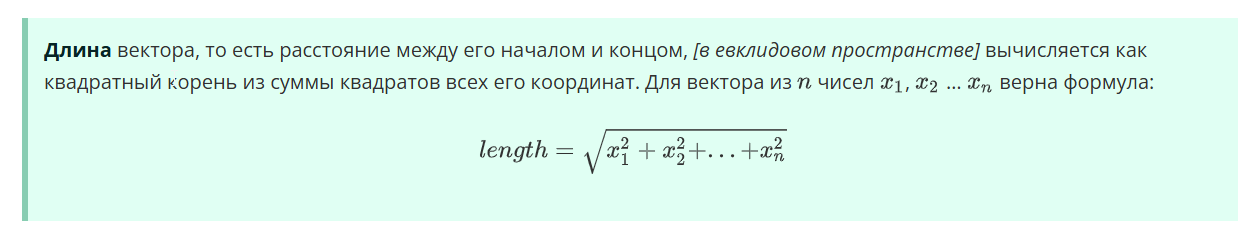

In [ ]:
vec = np.array([3, 4])
#посчитаем длинну этого вектора
length = np.sqrt(np.sum(vec ** 2))
print(length)


5.0


В Numpy также есть модуль linalg, позволяющий производить операции из линейной алгебры
Например, для вычисления длинны вектора есть функция norm

In [ ]:
length = np.linalg.norm(vec)
print(length)

5.0


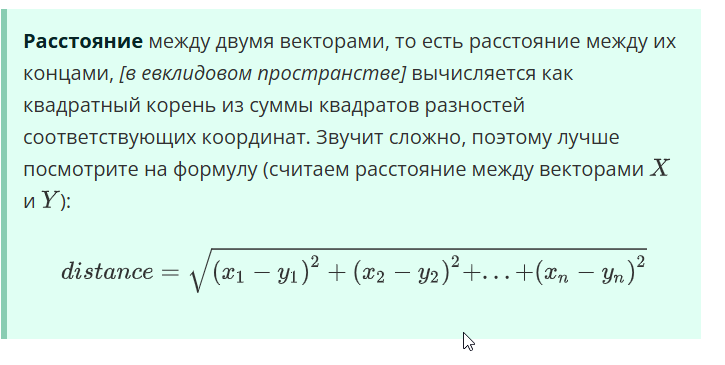

In [ ]:
#Способ 1
vec1 = np.array([0, 3, 5])
vec2 = np.array([12, 4, 7])
distance = np.sqrt(np.sum((vec1 - vec2) ** 2))
distance

12.206555615733702

In [ ]:
#Способ 2
vec1 = np.array([0, 3, 5])
vec2 = np.array([12, 4, 7])
distance = np.linalg.norm(vec1 - vec2)
distance

12.206555615733702

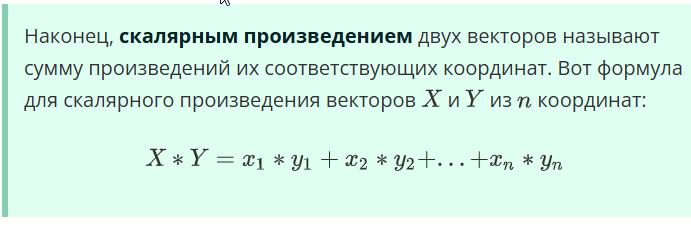

In [ ]:
#Способ 1
vec1 = np.arange(1, 6)
vec2 = np.linspace(10, 20, 5)
scalar_product = np.sum(vec1 * vec2)
print(scalar_product)
print(len(vec1))
print(len(vec2))
print(vec1)
print(vec2)

250.0
5
5
[1 2 3 4 5]
[10.  12.5 15.  17.5 20. ]


In [ ]:
#Способ 2
scalar_product = np.dot(vec1, vec2)
scalar_product

250.0

##Статистические функции с векторами


In [ ]:
vec = np.array([2,7,18,28,18,1,8,4])
print(vec.min())
print(np.max(vec))
print(vec.mean())

1
28
10.75


##Случайные числа

###Генерация float

In [ ]:
#Для генерации псевдослучайных чисел в NumPy существует подмодуль random.
np.random.rand()

0.49818694061013724

In [ ]:
#получаем рандомное число от 1 до 100
np.random.rand() * 100

72.93649765681427

In [ ]:
#Получаем массив из 5 рандомных чисел
np.random.rand(5)

array([0.59895492, 0.80829596, 0.56575107, 0.10853285, 0.44534864])

In [ ]:
#Массив из двух случайных строк и трёх столбцов:
np.random.rand(2, 3)

array([[0.9381164 , 0.71148284, 0.00288619],
       [0.47854694, 0.3233838 , 0.12157079]])

In [ ]:
#При этом, передать кортеж в фунцию rand не получится
shape = (3, 4)
np.random.rand(shape)

TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
# поэтому воспользуемся функцией sample
shape = (2, 3)
np.random.sample(shape)

array([[0.34170534, 0.96890275, 0.35482828],
       [0.72067839, 0.32784688, 0.40061347]])

In [ ]:
#Если же нужно число не в диопазоне от 0 до 1, то есть функция uniform
#uniform(low=0.0 нижн. граница, high=1.0 верхняя граница, size=None форма массива)
print(np.random.uniform())
print(np.random.uniform(400, -654))
print(np.random.uniform(-49, 55, 10))
print(np.random.uniform(54.6, 234, size = (2,3)))

0.8474409578000852
166.8430651865824
[  8.50237428  13.82525439  14.22540084   6.089562    -2.26352729
 -10.03158563 -30.84010663 -38.1411329    8.77769314 -32.73560343]
[[ 83.05219386 219.57867137 119.20350359]
 [131.74731951 149.36877884  85.32334668]]


### Генерация int
для этого используется функция random.randint:

Функцию randint нельзя запустить совсем без параметров, необходимо указать хотя бы одно число.

* Если указан только аргумент low, числа будут генерироваться от 0 до low-1, то есть верхняя граница не включается.
*  Если задать low и high, числа будут генерироваться от low (включительно) до high (не включительно).


* size задаёт форму массива уже привычным для вас образом: одним числом — для одномерного или кортежем — для многомерного.
* dtype позволяет задать конкретный тип данных, который должен быть использован в массиве.

In [ ]:
np.random.randint(4, size=(2,3))

array([[0, 3, 0],
       [0, 3, 3]])

In [ ]:
np.random.randint(6, 12, size=(3,3))

array([[ 9, 10,  7],
       [11,  8,  9],
       [ 6,  9,  7]])

##Генерация выборок

In [ ]:
#перемешать все числа в массиве можно с помощью random.shuffle
arr = np.arange(6)
print(np.random.shuffle(arr))
arr
#Функция random.shuffle перемешивает тот массив, к которому применяется, и возвращает None.

None


array([1, 5, 4, 0, 2, 3])

In [ ]:
#теперь перемешаем массив, оставив предыдущий без изменений
#В этом случае также не обязательно передавать в функцию массив
playlist = ["The Beatles", "Pink Floyd", "ACDC", "Deep Purple"]
shuffled = np.random.permutation(playlist)
print(shuffled)
print(playlist)

['Deep Purple' 'ACDC' 'Pink Floyd' 'The Beatles']
['The Beatles', 'Pink Floyd', 'ACDC', 'Deep Purple']


In [ ]:
#перемешаем числа в рандомном порядке
np.random.permutation(10)

array([8, 1, 5, 4, 2, 0, 9, 6, 7, 3])

In [ ]:
#Чтобы получить случайный набор объектов из массива, используется функция random.choice:
#choice(a, size=None, replace=True)
#а - сам массив
#size = форма / размер массива
# replace - параметр, определяющий могут ли повторяться элементы
workers = ['Ivan', 'Nikita', 'Maria', 'John', 'Kate']
choice = np.random.choice(workers, size = 2, replace = False)
print(choice)

['Kate' 'John']


##Seed генератора псевдослучайных чисел
Иногда бывает необходимо получать одинаковые воспроизводимые последовательности случайных чисел, например чтобы проверить результаты вычислений, для которых использовались случайные числа, на предмет ошибок.

In [ ]:
np.random.seed(23)
np.random.randint(10, size=(3,4))

array([[3, 6, 8, 9],
       [6, 8, 7, 9],
       [3, 6, 1, 2]])

In [ ]:
np.random.seed(100)
print(np.random.randint(10, size=3))
print(np.random.randint(10, size=3))
print(np.random.randint(10, size=3))

[8 8 3]
[7 7 0]
[4 2 5]


In [ ]:
import numpy as np
seed = 2021
np.random.seed(seed)
simple = np.random.rand()
randoms = np.random.uniform(-150, 2021, 120)
table = np.random.randint(1, 100, (3,2))
even = np.arange(2, 17, 2)
mix = np.random.permutation(even)
select = np.random.choice(even, size = 3, replace = False)
triplet = np.random.permutation(select)

###Задание 10.6

Напишите функцию get_chess(a), которая принимает на вход длину стороны квадрата a и возвращает двумерный массив формы (a, a), заполненный 0 и 1 в шахматном порядке. В левом верхнем углу всегда должен быть ноль.

Примечание. воспользуйтесь функцией np.zeros, а затем с помощью срезов без циклов задайте необходимым элементам значение 1.

В Python для получения каждого второго элемента используется срез [::2]. Подумайте, как грамотно применить этот принцип к двумерному массиву.

In [ ]:
#Создаём функцию
def get_chess(a):
  #создаём массив размером а * а
  arr = np.zeros((a,a))
  #подменяем нужные значения единицами
  arr[::1, ::2] = 1
  arr[::2, ::1] = 1
  arr[::2, ::2] = 0

  return arr
get_chess(6)

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0.]])

In [ ]:
#идеальное решение:
import numpy as np
def get_chess(a):
    arr = np.zeros((a,a))
    arr[1::2, ::2] = 1
    arr[::2, 1::2] = 1
    return arr

Вы разрабатываете приложение для прослушивания музыки. Конечно же, там будет доступна функция перемешивания плейлиста. Пользователю может настолько понравиться перемешанная версия плейлиста, что он захочет сохранить его копию. Однако вы не хотите хранить в памяти новую версию плейлиста, а просто хотите сохранять тот seed, с которым он был сгенерирован.

Для этого напишите функцию shuffle_seed(array), которая принимает на вход массив из чисел, генерирует случайное число для seed в диапазоне от 0 до 2**32 - 1 (включительно) и возвращает кортеж: перемешанный с данным seed массив (исходный массив должен оставаться без изменений), а также seed, с которым этот массив был получен.
Пример:

In [ ]:
array = [1, 2, 3, 4, 5]
shuffle_seed(array)
# (array([1, 3, 2, 4, 5]), 2332342819)
shuffle_seed(array)
# (array([4, 5, 2, 3, 1]), 4155165971)


In [ ]:
import numpy as np
def shuffle_seed(array):
  seed = np.random.randint(0, 2**32 - 1)
  result = [array, seed]
  result_tuple = tuple(result)
  return result_tuple
print(sorted(shuffle_seed([1, 2, 3, 4, 5, 10, 15])[0]) == sorted([1, 2, 3, 4, 5, 10, 15]))

True


In [ ]:
#Идеальное решение
import numpy as np

def shuffle_seed(array):
    seed = np.random.randint(2 ** 32)
    np.random.seed(seed)
    result = np.random.permutation(array)
    return result, seed

Напишите функцию min_max_dist(*vectors), которая принимает на вход неограниченное число векторов через запятую. Гарантируется, что все векторы, которые передаются, одинаковой длины.

Функция возвращает минимальное и максимальное расстояние между векторами в виде кортежа.

In [ ]:
vec1 = np.array([1,2,3])
vec2 = np.array([4,5,6])
vec3 = np.array([7, 8, 9])
def min_max_dist(*vectors):
  n = len(vectors)
  distances = []
  for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(vectors[i] - vectors[j])
            distances.append(dist)
  mm_list = [min(distances), max(distances)]
  result = tuple(mm_list)

  return result
min_max_dist(vec1, vec2, vec3)

TypeError: 'int' object is not callable

Как работает этот цикл:
Переменная n:

В начале функции мы вычисляем количество переданных векторов: n = len(vectors). Это даёт нам количество векторов, которые нужно проверить.
Внешний цикл for i in range(n):

Этот цикл перебирает индексы векторов от 0 до n-1.
i — индекс текущего вектора. Этот цикл гарантирует, что для каждого вектора мы будем проверять расстояние до всех остальных векторов, которые ещё не были проверены.
Внутренний цикл for j in range(i + 1, n):

Внутри внешнего цикла есть ещё один цикл. Он перебирает индексы всех векторов, которые идут после текущего вектора с индексом i.
j — это индекс следующего вектора, с которым мы будем сравнивать вектор с индексом i.
Цикл начинается с i + 1, чтобы:
Избежать повторных вычислений: расстояние между векторами A и B то же самое, что и расстояние между векторами B и A, поэтому мы проверяем каждую пару векторов только один раз.
Не сравнивать вектор с самим собой, так как расстояние между одним и тем же вектором всегда равно 0.
Вычисление расстояния:

Для каждой пары векторов с индексами i и j мы вычисляем расстояние между ними с помощью:
python
Copy code
dist = np.linalg.norm(vectors[i] - vectors[j])
Здесь мы используем функцию np.linalg.norm(), чтобы вычислить евклидово расстояние между двумя векторами.
Сохранение результата:

Полученное расстояние добавляется в список distances:
python
Copy code
distances.append(dist)
Пример работы на трёх векторах:
Допустим, у нас есть три вектора:

python
Copy code
vec1 = np.array([1, 2, 3])
vec2 = np.array([4, 5, 6])
vec3 = np.array([7, 8, 9])
В этом случае:

Внешний цикл:
i = 0 (первый вектор vec1)
Внутренний цикл:
j = 1 (второй вектор vec2): считаем расстояние между vec1 и vec2.
j = 2 (третий вектор vec3): считаем расстояние между vec1 и vec3.
i = 1 (второй вектор vec2)
Внутренний цикл:
j = 2 (третий вектор vec3): считаем расстояние между vec2 и vec3.
Таким образом, все три пары будут обработаны: (vec1, vec2), (vec1, vec3), и (vec2, vec3).

Вывод:
В результате мы получаем список всех расстояний между парами векторов. После этого, с помощью min(distances) и max(distances), находим минимальное и максимальное расстояние между векторами.

Напишите функцию any_normal, которая принимает на вход неограниченное число векторов через запятую. Гарантируется, что все векторы, которые передаются, одинаковой длины.

Функция возвращает True, если есть хотя бы одна пара перпендикулярных векторов. Иначе возвращает False.

In [ ]:
import numpy as np
vec1 = np.array([2, 1])
vec2 = np.array([-1, 2])
vec3 = np.array([3,4])
def any_normal(*vectors):
    n = len(vectors)
    perp_vec_count = 0
    for i in range (n):
        for j in range (i + 1, n):
            scalar_product = np.dot(vectors[i], vectors[j])
            if scalar_product == 0:
                perp_vec_count +=1
            else: pass
    if  perp_vec_count == 0: return False
    else: return True
print(any_normal(vec1, vec2, vec3))

True


Задание 10.10
Напишите функцию get_loto(num), генерирующую трёхмерный массив случайных целых чисел от 1 до 100 (включительно). Это поля для игры в лото.

Трёхмерный массив должен состоять из таблиц чисел формы 5х5, то есть итоговая форма — (num, 5, 5).

Функция возвращает полученный массив.

Пример


```
get_loto(3)

array([[[ 35,  66,  38,  11,  32],
       [ 32,   7,  37,  83,  42],
       [ 89,  37,  19,  51,  89],
       [ 70, 100,  83,   5,  11],
       [ 20,  13,  60,  26,  41]],

      [[ 23,  49,  76,  44,  43],
       [ 59,  63,  99,  92,   2],
       [ 83,   4,  25,  73,  19],
       [ 10,  18,  40,  11,  21],
       [ 58,  45,  73,  93,  61]],

      [[100,  88,  70,  34,  51],
       [  5,  35,  36,  85,  88],
       [ 72,  23,  87,  30,  40],
       [ 29,  21,  51,  73,  81],
       [ 91,  19,  87,  60,  27]]])
```

In [ ]:
def get_loto(num):
  arr = np.random.randint(0, 101, size=(num, 5, 5))
  return arr
print(get_loto(3))

[[[ 0 99 25 67 46]
  [95 91 86 89 91]
  [98 47  2 84 33]
  [73 71 57 65 60]
  [69  6 85 25 87]]

 [[34 67 64 12 61]
  [87 76 43 82 12]
  [ 2 20  4  6 31]
  [22 78 41 53 52]
  [66 33 68 60 60]]

 [[37 22 20 94 45]
  [89 64  2 83 29]
  [78 11 36 30 38]
  [39  9 64 30  7]
  [55 58 17 40 86]]]


Задание 10.11:

Напишите функцию get_unique_loto(num). Она так же, как и функция в задании 49.9.10, генерирует num полей для игры в лото, однако теперь на каждом поле 5х5 числа не могут повторяться.

Функция также должна возвращать массив формы num x 5 x 5.

In [ ]:

print(get_unique_loto(3))

[[[ 62  14  37  44   2]
  [ 70  11  61  39  72]
  [ 78  57  38  58  98]
  [ 28  48  13  60 100]
  [ 89   4  99  35  81]]

 [[ 75  36  44  48  41]
  [ 98  82  70  79  87]
  [ 85  15  34  69  77]
  [ 57  51  18  65  81]
  [ 88  16  22  74  76]]

 [[ 98  22  57  27  50]
  [ 62  87  23  43  82]
  [  6  28  76  88  33]
  [ 40  61  70  55  71]
  [ 30  79 100  92  96]]]
